# **Exploratory Data Analysis (EDA) of Inventory Data for TheLook eCommerce**
## **Introduction**
TheLook is a fictional eCommerce clothing platform created by the Looker team. The dataset includes synthetic data on customers, products, orders, logistics, web interactions, and digital marketing campaigns. It is intended for use in product discovery, testing, and evaluation.

This project is centered around analyzing inventory turnover, identifying fast- and slow-moving product categories, and uncovering seasonal sales trends. Using tools like pandas, matplotlib, and seaborn, we perform an in-depth Exploratory Data Analysis (EDA) to extract actionable insights aimed at optimizing inventory management.
## **Dataset Overview**
The dataset includes:
- **Timestamps** (`created_at`, `sold_at`): Track when products were added to inventory and when they were sold.
- **Product details**: Information on category, brand, department, and pricing.
- **Inventory turnover metrics**: Measure how efficiently products move through inventory.
### **Business Questions**
This analysis aims to answer the following key business questions:
1. **Inventory Turnover Efficiency** – How long do products stay in inventory before being sold?
2. **Best-Selling vs. Least-Selling Categories** – Which product categories experience the highest and lowest turnover rates?
3. **Seasonal Inventory Trends** – How does inventory turnover vary across different seasons?
## **Objectives**
- **Data Cleaning & Preprocessing:** Handling missing values, duplicates, and incorrect data types.
- **Inventory Turnover Analysis:** Calculating the time products spend in inventory before being sold.
- **Categorization:** Classifying products into **fast-moving** and **slow-moving** categories.
- **Seasonality Trends:** Identifying how sales behavior changes over time.
Through this analysis, we provide actionable insights to **improve inventory management**, **reduce stock inefficiencies**, and **optimize product restocking strategies**.

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#Importing the required libraries to analyze the dataset (Inventory_Items).

In [8]:
inv=pd.read_csv("inventory_items.csv.zip")
#Creating a variable to read the file and ease the analysis process.

In [9]:
inv.info()
#Introducing the basic information to understand the dataset, including the empty variables count and data types.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 490705 entries, 0 to 490704
Data columns (total 12 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              490705 non-null  int64  
 1   product_id                      490705 non-null  int64  
 2   created_at                      490705 non-null  object 
 3   sold_at                         181759 non-null  object 
 4   cost                            490705 non-null  float64
 5   product_category                490705 non-null  object 
 6   product_name                    490676 non-null  object 
 7   product_brand                   490304 non-null  object 
 8   product_retail_price            490705 non-null  float64
 9   product_department              490705 non-null  object 
 10  product_sku                     490705 non-null  object 
 11  product_distribution_center_id  490705 non-null  int64  
dtypes: float64(2), i

- **181,759** products have been sold, while **308,946** remain unsold.
- This suggests either slow inventory movement or excess stock that hasn’t been sold yet.


In [10]:
inv.describe()
#Shows a detailed description of the dataset that helps identifies possible errors.

,id,product_id,cost,product_retail_price,product_distribution_center_id
count,490705.000000,490705.000000,490705.000000,490705.000000,490705.000000
mean,245353.000000,15254.164465,28.658986,59.569440,5.011514
std,141654.476259,8410.586173,31.009435,66.592452,2.900016
min,1.000000,1.000000,0.008300,0.020000,1.000000
25%,122677.000000,7984.000000,11.368000,24.500000,2.000000
50%,245353.000000,15970.000000,19.832000,39.990002,5.000000
75%,368029.000000,22502.000000,34.550301,69.949997,8.000000
max,490705.000000,29120.000000,557.151002,999.000000,10.000000


- **Significant cost and retail price variation** across products.
- Some **very cheap products (near zero)** exist, possibly promotional or mispriced.

# Data Cleaning & Preprocessing

In [11]:
inv['created_at'] = pd.to_datetime(inv['created_at'], format='ISO8601', errors='coerce')
inv['sold_at'] = pd.to_datetime(inv['sold_at'], format='ISO8601', errors='coerce')
# Converting 'created_at' and 'sold_at' columns to datetime format
# This creates a cleaner visual for the data

In [12]:
inv["is_sold"]=inv["sold_at"].notna()
inv["turnover_time"]=(inv["sold_at"]-inv["created_at"]).dt.days
inv.loc[~inv['is_sold'], 'turnover_time'] = None
inv 
# Creating a new column 'is_sold' to indicate whether a product has been sold
# Calculating 'turnover_time' as the number of days between 'created_at' and 'sold_at'
# Setting 'turnover_time' to None for products that have not been sold


,id,product_id,created_at,sold_at,cost,product_category,product_name,product_brand,product_retail_price,product_department,product_sku,product_distribution_center_id,is_sold,turnover_time
0,67971,13844,2022-07-02 07:09:20+00:00,2022-07-24 06:33:20+00:00,2.76804,Accessories,(ONE) 1 Satin Headband,Funny Girl Designs,6.99,Women,2A3E953A5E3D81E67945BCE5519F84C8,7,True,21.0
1,67972,13844,2023-12-20 03:28:00+00:00,NaT,2.76804,Accessories,(ONE) 1 Satin Headband,Funny Girl Designs,6.99,Women,2A3E953A5E3D81E67945BCE5519F84C8,7,False,NaN
2,67973,13844,2023-06-04 02:53:00+00:00,NaT,2.76804,Accessories,(ONE) 1 Satin Headband,Funny Girl Designs,6.99,Women,2A3E953A5E3D81E67945BCE5519F84C8,7,False,NaN
3,72863,13844,2021-10-16 22:58:52+00:00,2021-11-22 02:19:52+00:00,2.76804,Accessories,(ONE) 1 Satin Headband,Funny Girl Designs,6.99,Women,2A3E953A5E3D81E67945BCE5519F84C8,7,True,36.0
4,72864,13844,2021-08-07 16:33:00+00:00,NaT,2.76804,Accessories,(ONE) 1 Satin Headband,Funny Girl Designs,6.99,Women,2A3E953A5E3D81E67945BCE5519F84C8,7,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490700,311018,25590,2021-12-07 12:47:00+00:00,NaT,10.39200,Underwear,ck one Men's Micro Slim Fit Boxer,Calvin Klein,24.00,Men,F220707C3AFE39D1779E0A34AF72BB7F,3,False,NaN
490701,451084,25590,2023-10-10 11:57:57+00:00,2023-11-27 11:28:57+00:00,10.39200,Underwear,ck one Men's Micro Slim Fit Boxer,Calvin Klein,24.00,Men,F220707C3AFE39D1779E0A34AF72BB7F,3,True,47.0
490702,451085,25590,2020-11-20 05:55:00+00:00,NaT,10.39200,Underwear,ck one Men's Micro Slim Fit Boxer,Calvin Klein,24.00,Men,F220707C3AFE39D1779E0A34AF72BB7F,3,False,NaN
490703,486057,25590,2023-02-26 22:35:12+00:00,2023-04-23 01:24:12+00:00,10.39200,Underwear,ck one Men's Micro Slim Fit Boxer,Calvin Klein,24.00,Men,F220707C3AFE39D1779E0A34AF72BB7F,3,True,55.0


In [13]:
inv["turnover_time"].mean
# Calculating the mean turnover time (average number of days products take to sell)
# This gives an idea of the average selling time for sold products.

<bound method NDFrame._add_numeric_operations.<locals>.mean of 0         21.0
1          NaN
2          NaN
3         36.0
4          NaN
          ... 
490700     NaN
490701    47.0
490702     NaN
490703    55.0
490704     NaN
Name: turnover_time, Length: 490705, dtype: float64>

In [14]:
p=inv["turnover_time"]
def turnover_pace(p):
    if pd.isna(p):
        return "Unsold"
    elif p<= 29:
        return "Fast Selling"
    else:
        return "Slow Selling"
#Creating an if-statement function to categories the time that the items stayed in the inventory.

In [15]:
inv["Turnover_category"] = inv["turnover_time"].apply(turnover_pace)
print(inv["Turnover_category"].value_counts())
#Applying the above function to create a new column.


Turnover_category
Unsold          308946
Fast Selling     91105
Slow Selling     90654
Name: count, dtype: int64


In [16]:
# Define a function to map product categories to broader groups
def categorize_product(category):
    if category in ['Dresses', 'Pants', 'Jeans', 'Shorts', 'Skirts', 'Tops & Tees', 'Clothing Sets']:
        return 'Clothing'
    elif category in ['Active', 'Leggings']:
        return 'Activewear'
    elif category in ['Blazers & Jackets', 'Suits', 'Suits & Sport Coats']:
        return 'Formalwear'
    elif category in ['Underwear', 'Intimates', 'Socks', 'Socks & Hosiery']:
        return 'Undergarments'
    elif category in ['Sleep & Lounge', 'Maternity']:
        return 'Sleepwear & Loungewear'
    elif category in ['Swim']:
        return 'Swimwear'
    elif category in ['Sweaters', 'Fashion Hoodies & Sweatshirts', 'Outerwear & Coats']:
        return 'Winterwear'
    else:
        return 'Other'
# Apply the function to create a new column
inv['category_group'] = inv['product_category'].apply(categorize_product)

# Display the first few rows to check the new column
print(inv[['product_category', 'category_group']].head(10))

# Count the number of products in each category group
print(inv['category_group'].value_counts())


  product_category category_group
0      Accessories          Other
1      Accessories          Other
2      Accessories          Other
3      Accessories          Other
4      Accessories          Other
5      Accessories          Other
6      Accessories          Other
7      Accessories          Other
8      Accessories          Other
9      Accessories          Other
category_group
Clothing                  136839
Winterwear                 86813
Undergarments              84040
Other                      49738
Sleepwear & Loungewear     43569
Activewear                 33252
Swimwear                   30870
Formalwear                 25584
Name: count, dtype: int64


In [17]:
# Define a function to map the month into seasons.
def assign_season(month):
    if month in [12, 1, 2]:
        return "Winter"
    elif month in [3, 4, 5]:
        return "Spring"
    elif month in [6, 7, 8]:
        return "Summer"
    elif month in [9, 10, 11]:
        return "Autumn"
    else:
        return "Unknown"
    
# Ensure 'sold_at' is in datetime format
inv['sold_at'] = pd.to_datetime(inv['sold_at'], errors='coerce')

# Extract month and apply the function
inv['season'] = inv['sold_at'].dt.month.apply(assign_season)

# Check if the column is created successfully
print(inv[['sold_at', 'season']].head(10))

# Count the number of products in each season
print(inv['season'].value_counts())


                    sold_at   season
0 2022-07-24 06:33:20+00:00   Summer
1                       NaT  Unknown
2                       NaT  Unknown
3 2021-11-22 02:19:52+00:00   Autumn
4                       NaT  Unknown
5 2023-11-15 13:49:09+00:00   Autumn
6                       NaT  Unknown
7 2024-01-13 23:58:59+00:00   Winter
8                       NaT  Unknown
9                       NaT  Unknown
season
Unknown    308946
Winter      54205
Autumn      51285
Summer      41636
Spring      34633
Name: count, dtype: int64


In [18]:
inv["profit"]=inv["product_retail_price"]-inv["cost"]
inv.head
# Calculating the profit for each product

<bound method NDFrame.head of             id  product_id                created_at  \
0        67971       13844 2022-07-02 07:09:20+00:00   
1        67972       13844 2023-12-20 03:28:00+00:00   
2        67973       13844 2023-06-04 02:53:00+00:00   
3        72863       13844 2021-10-16 22:58:52+00:00   
4        72864       13844 2021-08-07 16:33:00+00:00   
...        ...         ...                       ...   
490700  311018       25590 2021-12-07 12:47:00+00:00   
490701  451084       25590 2023-10-10 11:57:57+00:00   
490702  451085       25590 2020-11-20 05:55:00+00:00   
490703  486057       25590 2023-02-26 22:35:12+00:00   
490704  486058       25590 2022-09-12 13:52:00+00:00   

                         sold_at      cost product_category  \
0      2022-07-24 06:33:20+00:00   2.76804      Accessories   
1                            NaT   2.76804      Accessories   
2                            NaT   2.76804      Accessories   
3      2021-11-22 02:19:52+00:00   2.76804   

# Exploratory Analysis

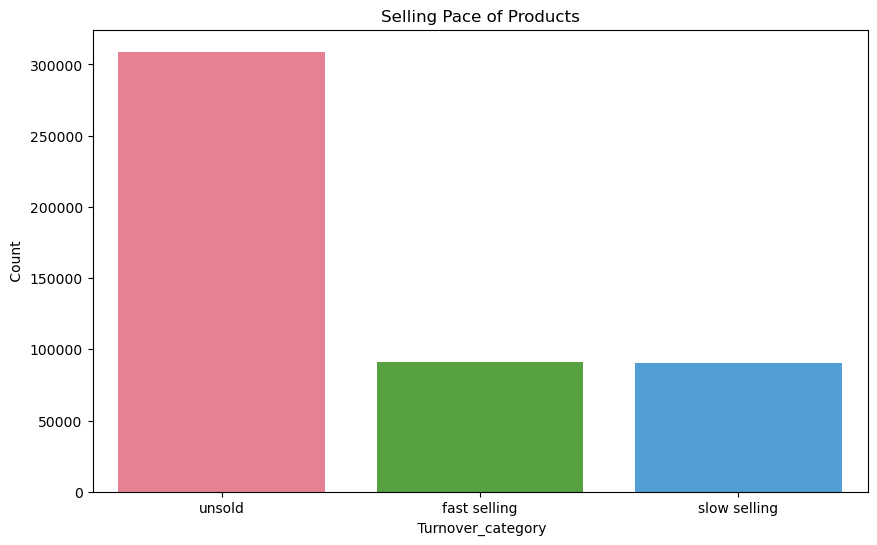

In [43]:
counts = inv["Turnover_category"].value_counts().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.countplot(data = inv, x="Turnover_category" ,order=counts.index, palette = "husl")

plt.title("Selling Pace of Products")
plt.xlabel(" Turnover_category")
plt.ylabel(" Count ")

plt.show()
# Counting the number of occurrences for each category in 'Turnover_category'
# Creating a count plot (bar chart) using Seaborn



# **Turnover Category Analysis - Bar Chart**

The bar chart visualizes the distribution of products based on their turnover category, divided into three groups:
- **Unsold**
- **Fast Selling**
- **Slow Selling**


- **Majority of Products are Unsold**: The largest category is **"Unsold"**, with over **300,000 products**, accounting for the majority of inventory. This suggests potential issues such as:
  - Overproduction or overstocking.
  - Poor demand for certain products.
  - Ineffective pricing or marketing strategies.
  
- **Fast and Slow Selling Products are Nearly Equal**:  
  - **Fast Selling** products (~91,000) sell within **29 days**, indicating high demand or effective pricing.
  - **Slow Selling** products (~90,000) take longer than 29 days to sell.



In [20]:
inv["month"]= inv['sold_at'].dt.month
inv["month_name"]=inv["sold_at"].dt.month_name()
inv.head
# Extracting the month number from the 'sold_at' column
# This will create a new column 'month' that stores the numeric months

<bound method NDFrame.head of             id  product_id                created_at  \
0        67971       13844 2022-07-02 07:09:20+00:00   
1        67972       13844 2023-12-20 03:28:00+00:00   
2        67973       13844 2023-06-04 02:53:00+00:00   
3        72863       13844 2021-10-16 22:58:52+00:00   
4        72864       13844 2021-08-07 16:33:00+00:00   
...        ...         ...                       ...   
490700  311018       25590 2021-12-07 12:47:00+00:00   
490701  451084       25590 2023-10-10 11:57:57+00:00   
490702  451085       25590 2020-11-20 05:55:00+00:00   
490703  486057       25590 2023-02-26 22:35:12+00:00   
490704  486058       25590 2022-09-12 13:52:00+00:00   

                         sold_at      cost product_category  \
0      2022-07-24 06:33:20+00:00   2.76804      Accessories   
1                            NaT   2.76804      Accessories   
2                            NaT   2.76804      Accessories   
3      2021-11-22 02:19:52+00:00   2.76804   

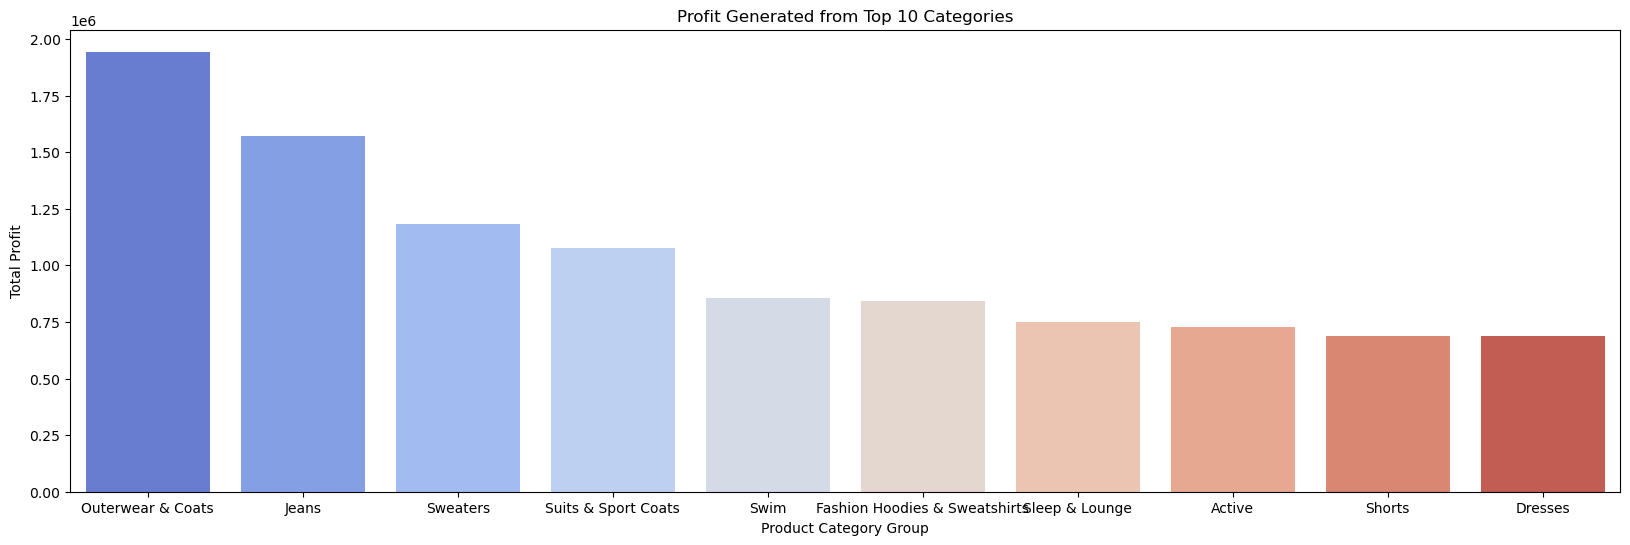

In [42]:
Top_10 = inv.groupby('product_category')['profit'].sum().sort_values(ascending=False).head(10)

# Set figure size
plt.figure(figsize=(20,6))

# Create the bar plot for the top 10 categories
sns.barplot(x=Top_10.index, y=Top_10.values, palette='coolwarm')

# Add labels for the axes
plt.xlabel("Product Category Group")
plt.ylabel("Total Profit")
plt.title("Profit Generated from Top 10 Categories")

# Show the plot
plt.show()

# **Profit Analysis of Top 10 Product Categories**

## **1. Overview**
The bar chart represents the **total profit** generated from the **top 10 product categories**. The x-axis shows the product categories, while the y-axis represents the total profit.

## **2. Key Observations**
- **"Outerwear & Coats" is the most profitable category**, generating nearly **$2 million** in profit.
- **"Jeans" follows closely**, with profits exceeding **$1.5 million**.
- **"Sweaters," "Suits & Sport Coats," and "Swim"** also contribute significantly to total profit, though at a slightly lower level.
- The **lower-tier categories (Active, Shorts, Dresses, etc.)** generate noticeably less profit but are still among the top 10.
- The **profit differences across categories indicate varying demand and pricing strategies**, suggesting that outerwear and jeans may have higher markups or stronger sales volumes.

## **3. Potential Business Implications**
- **Stock more high-profit items**: Given that outerwear and jeans generate the highest profits, businesses should consider expanding inventory in these categories.
- **Investigate lower-performing categories**: While **Activewear, Shorts, and Dresses** still rank in the top 10, they generate significantly less profit. It may be beneficial to evaluate pricing, promotions, or demand for these items.
- **Optimize seasonal sales strategy**: Since **outerwear and coats** dominate profits, a seasonal analysis could determine the best time to increase stock and promotions.



In [25]:
Turnover_top3=inv["Turnover_category"].head(3)
Turnover_top3

0    Fast Selling
1          Unsold
2          Unsold
Name: Turnover_category, dtype: object

In [46]:
# Count unique category groups that contain fast-selling products
fast_selling_categories = inv[inv["Turnover_category"] == "Fast Selling"]["category_group"].nunique()

print(f"Number of fast-selling category groups: {fast_selling_categories}")



Number of fast-selling category groups: 8


<Figure size 2000x2000 with 0 Axes>

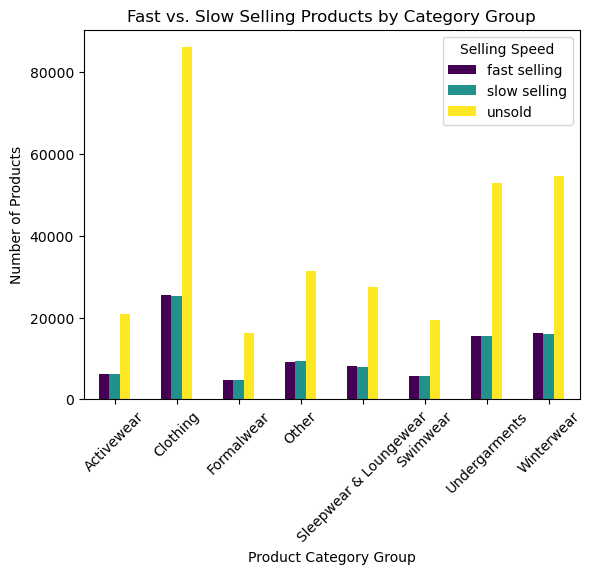

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ensure the column values are lowercase for consistency
inv["Turnover_category"] = inv["Turnover_category"].str.lower()

# Count the number of fast and slow-selling products per category group
fast_slow_group_counts = inv.groupby(["category_group", "Turnover_category"]).size().unstack()

# Plot clustered bar chart
plt.figure(figsize=(20, 20));
fast_slow_group_counts.plot(kind="bar", stacked=False, colormap="viridis");

# Add labels and title
plt.xlabel("Product Category Group")
plt.ylabel("Number of Products")
plt.title("Fast vs. Slow Selling Products by Category Group")
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.legend(title="Selling Speed")




# **Fast vs. Slow Selling Products by Category Group**

## **1. Overview**
This bar chart visualizes the number of products categorized by their **selling speed** across different product categories. The selling speeds are classified into:
- **Fast Selling** (dark purple)
- **Slow Selling** (teal)
- **Unsold** (yellow)

## **2. Key Observations**
- **High Unsold Inventory Across Categories**: 
  - Most categories have a **dominant yellow bar**, indicating that a large proportion of products remain **unsold**.
  - **Clothing and Winterwear** have the highest number of **unsold** items.
  
- **Clothing has the highest product volume**:
  - This category shows a significant number of **fast-selling and slow-selling products**, but it also has the highest unsold inventory.
  - This suggests that clothing may have **high stock levels**, but not all products move at the same rate.

- **Winterwear and Undergarments Show a Similar Trend**:
  - Both categories have a considerable number of **unsold products**, while also maintaining some **fast-selling items**.
  - This might be influenced by **seasonality**, where certain items sell quickly in specific periods.

- **Formalwear and Swimwear Have the Lowest Sales Activity**:
  - These categories have relatively **small bars overall**, indicating fewer products in inventory.
  - Despite fewer products, they still have a high unsold proportion, suggesting **low demand**.

## **3. Business Implications**
- **Reduce Overstocking for Clothing and Winterwear**:  
  - Since a large portion remains unsold, businesses should **adjust stock levels** based on demand trends.
  
- **Optimize Pricing and Promotions for Slow-Moving Items**:  
  - Categories with high slow-selling products may benefit from **discount strategies** or **bundling** to increase turnover.

- **Investigate Seasonal Trends for Winterwear and Swimwear**:  
  - If these categories sell better in specific months, inventory planning should align with **seasonal demand**.


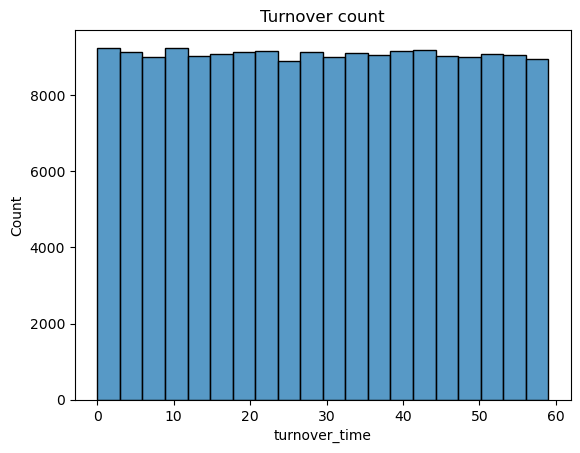

In [31]:
sns.histplot(data=inv, x="turnover_time", bins=20)
plt.title("Turnover count");

# **Turnover Time Distribution - Histogram Analysis**

## **1. Overview**
The histogram visualizes the **distribution of turnover time** (the number of days taken for products to sell). The x-axis represents the **turnover time in days**, while the y-axis represents the **count of products**.

## **2. Key Observations**
- The **distribution appears uniform** across different turnover times, meaning that products are selling at a steady rate over time.
- No significant peaks or drops indicate that **there isn't a strong seasonal trend** influencing how fast products sell.
- The turnover time is spread across **0 to ~60 days**, suggesting that most products take up to two months to sell.

## **3. Business Implications**
- **Stable demand**: Since the distribution is relatively even, products are not experiencing sudden spikes or slumps in sales over time.
- **Potential optimization**: While the data suggests products sell consistently, analyzing different product categories may reveal whether specific items sell faster than others.
- **Further segmentation needed**: It would be beneficial to split the data by product type or category to see if any specific items contribute to certain turnover patterns.


# **Final Analysis & Recommendations**

## **1. Conclusion**
The analysis of turnover time, product sales categories, and profitability provides several key insights:

- **High Unsold Inventory**: A significant portion of products remain **unsold**, especially in categories like **Clothing, Winterwear, and Undergarments**. This suggests potential issues with demand forecasting, overstocking, or pricing strategies.
- **Steady Turnover Rate**: The histogram shows that products sell **at a fairly uniform rate** over time, indicating that **demand is stable** but not accelerating for specific periods.
- **Category Performance Varies**: Categories like **Outerwear & Coats and Jeans** generate **the highest profits**, while others, such as **Swimwear and Formalwear**, have **low sales volume** and may require strategic changes.
- **Slow-Moving Inventory**: A large portion of items take **more than 29 days to sell**, suggesting that **certain products are not moving as quickly as they should**.

## **2. Recommendations for Improvement**
### **1. Improve Demand Forecasting & Inventory Management**
- Use **historical sales data** to **optimize stock levels** for high-selling products while reducing inventory for low-performing categories.
- Implement a **dynamic restocking system** to avoid overstocking products that historically remain unsold.

### **2. Optimize Pricing & Promotions**
- **Discount slow-selling items** or bundle them with fast-selling products to increase turnover.
- Introduce **seasonal promotions** for categories like **Winterwear** and **Swimwear**, ensuring they sell during peak seasons.

### **3. Focus on High-Profit Categories**
- Expand inventory and marketing efforts for **high-profit categories** like **Outerwear & Coats, Jeans, and Sweaters**.
- Reduce investments in **low-performing categories** or reassess their positioning in the market.

By implementing these recommendations, the company can **reduce unsold inventory, optimize turnover rates, and maximize profitability**.
